# LAB8 tutorial for Machine Learning <br/> Convolutional Neural Network
> 11912911 张子越

## LAB Assignment
### Exercise 1  Image Classifier(100 points )
Follow the above instructions of Image Classifier Training with PyTorch to train your own image classifier (using the [CIFAR10 dataset](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). 

Please try to improve performance of classification by trying different network structures (add layers, modify parameters and so on) and different training strategies (loss function, optimizer and so on). 

<font color='red' size=5>Note: Your accuracy in this exercise will directly determine your score.</font>

In [17]:
# cite: implemented in https://github.com/uoguelph-mlrg/Cutout
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
class Cutout(object):
    """
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        h = img.size(1)
        w = img.size(2)

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
        	# (x,y)表示方形补丁的中心位置
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.

        mask = torch.from_numpy(mask)
        mask = mask.expand_as(img)
        img = img * mask

        return img

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data.sampler import SubsetRandomSampler

from torchvision import datasets, transforms

torch.multiprocessing.set_sharing_strategy('file_system')

import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

n_epochs = 30
batch_size = 256
train_valid_split = 0.8
learning_rate = 0.1
random_seed = 1
num_workers = 0

torch.manual_seed(random_seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    Cutout(n_holes=1, length=16)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

trainlen = len(trainset)
indices = list(range(trainlen))
np.random.shuffle(indices)
split = int(train_valid_split * trainlen)
trainsampler = SubsetRandomSampler(indices[:split])
validsampler = SubsetRandomSampler(indices[split:])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=trainsampler, num_workers=num_workers)

validloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=validsampler, num_workers=num_workers)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

len(trainloader), len(validloader), len(testloader)

Files already downloaded and verified
Files already downloaded and verified


(157, 40, 40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


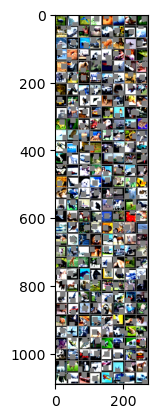

bird  plane plane frog  dog   plane frog  bird  horse car   deer  deer  truck cat   dog   plane ship  car   ship  car   dog   deer  bird  truck plane deer  truck truck plane car   cat   frog  bird  car   dog   bird  plane plane plane cat   cat   horse frog  horse truck car   deer  truck frog  horse truck truck car   dog   frog  car   car   horse cat   plane cat   car   frog  cat   cat   horse dog   car   deer  bird  deer  plane frog  bird  truck truck dog   ship  car   frog  plane frog  ship  horse deer  cat   frog  plane plane plane truck deer  truck truck cat   car   horse horse car   dog   plane ship  horse bird  dog   ship  cat   frog  dog   horse car   frog  deer  plane dog   ship  truck frog  bird  truck frog  car   plane ship  frog  cat   dog   cat   dog   cat   plane cat   horse horse dog   horse cat   cat   horse deer  plane deer  car   bird  ship  bird  frog  bird  frog  frog  bird  plane deer  frog  bird  dog   plane horse cat   truck horse deer  plane deer  truck truck truc

In [19]:
import torchvision

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# from torch.nn import functional
#
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)
#
#     def forward(self, x):
#         x = self.pool(functional.relu(self.conv1(x)))
#         x = self.pool(functional.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = functional.relu(self.fc1(x))
#         x = functional.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
#
#
# net = Net().to(device)
# print(net)

In [ ]:
# import torch.optim as optim
#
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)

In [ ]:
# # training
#
# from tqdm import tqdm
#
# history = {'Train Loss':[],'Test Loss':[],'Test Accuracy':[]}
#
# for epoch in range(1, n_epochs+1):  # loop over the dataset multiple times
#     processBar = tqdm(trainloader, unit='step')
#
#     train_loss_total = 0.0
#
#     net.train()
#
#     for step, (inputs, labels) in enumerate(processBar):
#         # get the inputs; data is a list of [inputs, labels]
#
#         inputs = inputs.to(device)
#         labels = labels.to(device)
#
#         # zero the parameter gradients
#         optimizer.zero_grad()
#
#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#
#         predictions = torch.argmax(outputs, dim=1)
#         accuracy = torch.sum(predictions == labels)/labels.shape[0]
#
#         loss.backward()
#         optimizer.step()
#
#         processBar.set_description(
#             f'Training... [{epoch}/{n_epochs}] Loss: {loss.item():.4f}, Acc: {accuracy.item():.4f}'
#         )
#
#         # print statistics
#         train_loss_total += loss
#
#         if step == len(processBar) - 1:
#             correct, test_loss_total = 0,0
#             totalSize = 0
#             net.eval()
#             for testImgs, labels in testloader:
#                 testImgs = testImgs.to(device)
#                 labels = labels.to(device)
#
#                 outputs = net(testImgs)
#                 loss = criterion(outputs, labels)
#                 totalSize += labels.size(0)
#                 test_loss_total += loss
#                 predictions = torch.argmax(outputs, dim=1)
#                 correct += torch.sum(predictions == labels)
#
#             test_accuracy = correct / totalSize
#             test_loss_avg = test_loss_total / len(testloader)
#             train_loss_avg = train_loss_total / len(trainloader)
#
#             history['Train Loss'].append(train_loss_avg.item())
#             history['Test Loss' ].append(test_loss_avg.item())
#             history['Test Accuracy'].append(test_accuracy.item())
#             processBar.set_description(
#                 f'Testing... [{epoch}/{n_epochs}] Loss: {loss.item():.4f}, Acc: {accuracy.item():.4f}, Test Loss: {test_loss_avg.item():.4f}, Test Acc: {test_accuracy.item():.4f}'
#             )
#
#     processBar.close()
#
#
# print('Finished Training')

In [ ]:
# # save the model
# PATH = './models/cifar10.pth'
#
# print(net)
# torch.save(net.state_dict(), PATH)

In [ ]:
# # load the model
#
# model = Net()
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [ ]:
# #fig=plt.figure(figsize=(10, 8), dpi=60)
# #对测试Loss进行可视化
# plt.plot(history['Train Loss'],label = 'Train Loss')
# plt.plot(history['Test Loss'],label = 'Test Loss')
# plt.legend(loc='best')
# plt.grid(True)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()

In [ ]:
# #对测试准确率进行可视化
# plt.plot(history['Test Accuracy'],color = 'red',label = 'Test Accuracy')
# plt.legend(loc='best')
# plt.grid(True)
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.show()

#### Test the network

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

net.eval()
outputs = net(images)

_, predicted = torch.max(outputs, dim=1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        net.eval()
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

#### ResNet18

reference:
- https://zhuanlan.zhihu.com/p/515734064
- https://github.com/ZOMIN28/ResNet18_Cifar10_95.46

In [20]:
import torch
from torch import nn


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """
    3x3 convolution with padding
    """
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False,
                     dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """
    1x1 convolution
    """
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, down_sample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError('Dilation > 1 not implemented in BasicBlock')
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.down_sample = down_sample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.down_sample is not None:
            identity = self.down_sample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block,  64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                # if isinstance(m, Bottleneck):
                #     nn.init.constant_(m.bn3.weight, 0)
                # elif isinstance(m, BasicBlock):
                #     nn.init.constant_(m.bn2.weight, 0)
                if isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        down_sample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            down_sample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = [block(self.inplanes, planes, stride, down_sample, self.groups,
                        self.base_width, previous_dilation, norm_layer)]
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))
        return nn.Sequential(*layers)


def _resnet(block, layers, **kwargs):
    model = ResNet(block, layers, **kwargs)
    return model


def ResNet18(**kwargs):
    return _resnet(BasicBlock, [2, 2, 2, 2], **kwargs)

##### Training

In [22]:
import torch
from torch import nn
from torch import optim
from tqdm import tqdm

#存储训练过程
history = {'Train Loss':[],'Valid Loss':[],'Valid Accuracy':[]}

n_epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = ResNet18()
model.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False)
model.fc = nn.Linear(512, len(classes))
model = model.to(device)

criterion = nn.CrossEntropyLoss().to(device)


lr = 0.1

for epoch in range(1, n_epochs+1):
    processBar = tqdm(trainloader, unit='step')

    if epoch % 10 == 0:
        lr *= 0.5
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)

    train_loss_total = 0.0

    model.train()
    for step, (inputs, labels) in enumerate(processBar):

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs).to(device)

        loss = criterion(outputs, labels)

        predictions = torch.argmax(outputs, dim=1)
        correct_num = torch.sum(predictions.eq(labels.data.view_as(predictions)))
        accuracy = correct_num / labels.shape[0]

        loss.backward()
        optimizer.step()

        processBar.set_description(f'[{epoch}/{n_epochs}] Loss: {loss.item():.4f}, Acc: {accuracy.item():.4f}')

        train_loss_total += loss

    processBar.close()

    ##########
    # validate model after training an epoch
    ##########
    correct_num_total = 0
    size_total = 0
    valid_loss_total = 0.0

    model.eval()
    with torch.no_grad():
        for (inputs, labels) in validloader:
            inputs = inputs.to(device)
            # print('valid',inputs.shape)
            labels = labels.to(device)

            outputs = model(inputs).to(device)

            loss = criterion(outputs, labels)

            predictions = torch.argmax(outputs, 1)
            correct_num = torch.sum(torch.eq(predictions, labels.data.view_as(predictions)))
            correct_num_total += correct_num

            size_total += labels.shape[0]
            valid_loss_total += loss

    valid_accuracy = correct_num_total / size_total
    valid_loss_avg = valid_loss_total / len(validloader)
    train_loss_avg = train_loss_total / len(trainloader)

    history['Train Loss'].append(train_loss_avg.item())
    history['Valid Loss'] .append(valid_loss_avg. item())
    history['Valid Accuracy'].append(valid_accuracy.item())

    print(f'[{epoch:d}/{n_epochs:d}] Valid Loss: {valid_loss_avg.item():.4f} Valid Acc: {valid_accuracy.item():.4f}')

[1/20] Loss: 2.0054, Acc: 0.2500: 100%|██████████| 157/157 [01:14<00:00,  2.10step/s]


[1/20] Valid Loss: 1.9974 Valid Acc: 0.2439


[2/20] Loss: 1.7870, Acc: 0.2812: 100%|██████████| 157/157 [01:13<00:00,  2.15step/s]


[2/20] Valid Loss: 1.8140 Valid Acc: 0.3132


[3/20] Loss: 1.6024, Acc: 0.4688: 100%|██████████| 157/157 [01:15<00:00,  2.09step/s]


[3/20] Valid Loss: 1.6409 Valid Acc: 0.3789


[4/20] Loss: 1.7694, Acc: 0.3438: 100%|██████████| 157/157 [01:15<00:00,  2.07step/s]


[4/20] Valid Loss: 1.5429 Valid Acc: 0.4240


[5/20] Loss: 1.3036, Acc: 0.5156: 100%|██████████| 157/157 [01:14<00:00,  2.10step/s]


[5/20] Valid Loss: 1.5113 Valid Acc: 0.4451


[6/20] Loss: 1.5019, Acc: 0.4844: 100%|██████████| 157/157 [01:14<00:00,  2.10step/s]


[6/20] Valid Loss: 1.4864 Valid Acc: 0.4637


[7/20] Loss: 1.3457, Acc: 0.5469: 100%|██████████| 157/157 [01:15<00:00,  2.07step/s]


[7/20] Valid Loss: 1.3234 Valid Acc: 0.5182


[8/20] Loss: 1.0305, Acc: 0.5781: 100%|██████████| 157/157 [01:15<00:00,  2.07step/s]


[8/20] Valid Loss: 1.2221 Valid Acc: 0.5640


[9/20] Loss: 1.2037, Acc: 0.5781: 100%|██████████| 157/157 [01:18<00:00,  2.01step/s]


[9/20] Valid Loss: 1.3015 Valid Acc: 0.5492


[10/20] Loss: 0.9204, Acc: 0.7031: 100%|██████████| 157/157 [01:17<00:00,  2.02step/s]


[10/20] Valid Loss: 0.9922 Valid Acc: 0.6452


[11/20] Loss: 1.0274, Acc: 0.6250: 100%|██████████| 157/157 [01:17<00:00,  2.04step/s]


[11/20] Valid Loss: 1.0558 Valid Acc: 0.6329


[12/20] Loss: 0.8812, Acc: 0.6875: 100%|██████████| 157/157 [01:17<00:00,  2.02step/s]


[12/20] Valid Loss: 0.9501 Valid Acc: 0.6602


[13/20] Loss: 0.9904, Acc: 0.7031: 100%|██████████| 157/157 [01:15<00:00,  2.08step/s]


[13/20] Valid Loss: 0.9939 Valid Acc: 0.6501


[14/20] Loss: 0.5676, Acc: 0.8125: 100%|██████████| 157/157 [01:16<00:00,  2.06step/s]


[14/20] Valid Loss: 1.0131 Valid Acc: 0.6412


[15/20] Loss: 0.9483, Acc: 0.6406: 100%|██████████| 157/157 [01:17<00:00,  2.03step/s]


[15/20] Valid Loss: 0.9281 Valid Acc: 0.6835


[16/20] Loss: 0.7323, Acc: 0.7344: 100%|██████████| 157/157 [01:16<00:00,  2.05step/s]


[16/20] Valid Loss: 0.8216 Valid Acc: 0.7088


[17/20] Loss: 0.9396, Acc: 0.7344: 100%|██████████| 157/157 [01:16<00:00,  2.04step/s]


[17/20] Valid Loss: 0.7464 Valid Acc: 0.7351


[18/20] Loss: 0.7993, Acc: 0.7188: 100%|██████████| 157/157 [01:17<00:00,  2.02step/s]


[18/20] Valid Loss: 0.7795 Valid Acc: 0.7219


[19/20] Loss: 0.5044, Acc: 0.8281: 100%|██████████| 157/157 [01:16<00:00,  2.05step/s]


[19/20] Valid Loss: 0.7537 Valid Acc: 0.7395


[20/20] Loss: 0.5660, Acc: 0.8438: 100%|██████████| 157/157 [01:18<00:00,  1.99step/s]


[20/20] Valid Loss: 0.5872 Valid Acc: 0.7982


In [23]:
correct_num_total = 0
size_total = 0
test_loss_total = 0.0

model.eval()
with torch.no_grad():
    for (inputs, labels) in testloader:
        inputs = inputs.to(device)
        # print('test',inputs.shape)
        labels = labels.to(device)

        outputs = model(inputs).to(device)

        loss = criterion(outputs, labels)

        predictions = torch.argmax(outputs, 1)
        correct_num = torch.sum(torch.eq(predictions, labels.data.view_as(predictions)))
        correct_num_total += correct_num

        size_total += labels.shape[0]
        test_loss_total += loss

test_accuracy = correct_num_total / size_total
test_loss_avg = test_loss_total / len(testloader)

print(f'Test Loss: {test_loss_avg.item():.4f} Test Acc: {test_accuracy.item():.4f}')

Test Loss: 0.4460 Test Acc: 0.8475


In [24]:
# save the model
PATH = 'cifar10_best.pth'

print(model)
torch.save(model.state_dict(), PATH)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

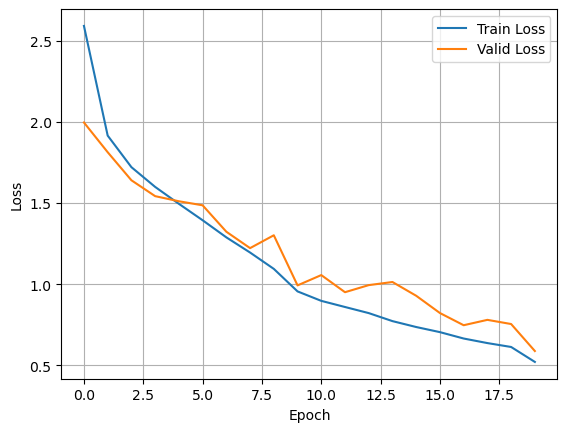

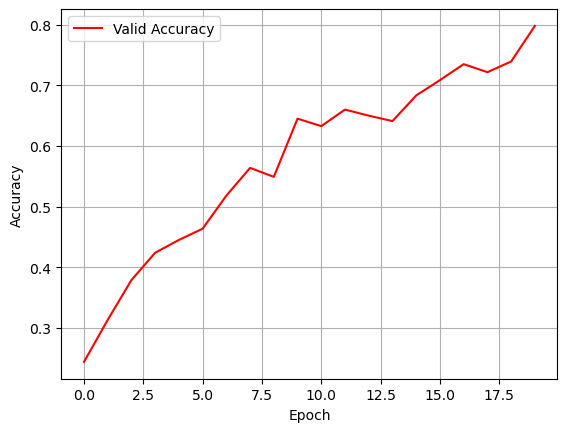

In [26]:
#对测试Loss进行可视化
plt.plot(history['Train Loss'],label = 'Train Loss')
plt.plot(history['Valid Loss'],label = 'Valid Loss')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#对测试准确率进行可视化
plt.plot(history['Valid Accuracy'],color = 'red',label = 'Valid Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Exercise 2  Questions (4 points )
1. Can neural networks be used for unsupervised clustering or data dimension reduction? Why?

2. What are the strengths of neural networks; when do they perform well?

3. What are the weaknesses of neural networks; when do they perform poorly?

4. What makes neural networks a good candidate for the classification regression problem, if you have enough knowledge about the data?

Answer:
=======

(1): 



(2):



(3):



(4):



